In [1]:
import sys
import math

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scipy.stats as stats

from mpengine import mpPandasObj
from tqdm import tqdm, tqdm_notebook
from multiprocessing import cpu_count

from util import cprintf
from fractionally_differentiated_features import getWeights, getWeights_FFD, plotWeights, fracDiff, fracDiff_FFD, plotMinFFD

#from sample_weights import mpNumCoEvents, mpSampleTW
#from financial_data_structures import returns
#from labeling import getDailyVol, getTEvents, addVerticalBarrier, getEvents

%matplotlib inline

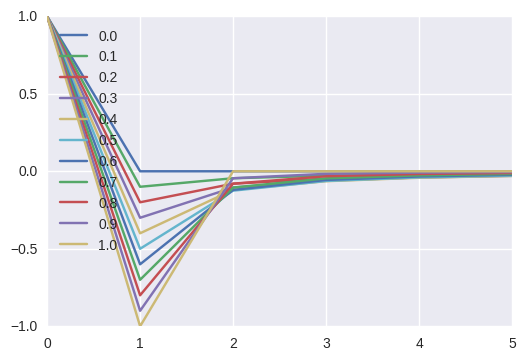

In [2]:
plotWeights(dRange=[0,1], nPlots=11, size=6)


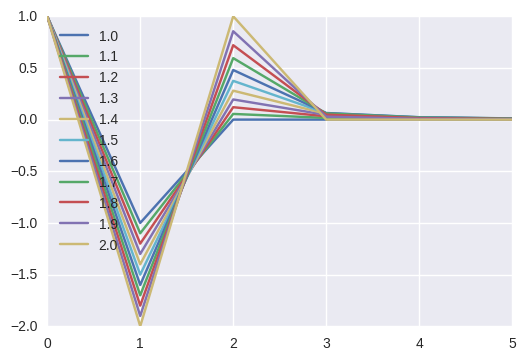

In [3]:
plotWeights(dRange=[1,2], nPlots=11, size=6)

In [4]:
df = pd.read_csv('data/dollar_bars.csv', index_col='dates').drop_duplicates()
df.index = pd.to_datetime(df.index)

close = df.price.copy()
close = close[~close.index.duplicated(keep='first')]

close = np.log(df[['price']])


width: 282; d: 0.400000


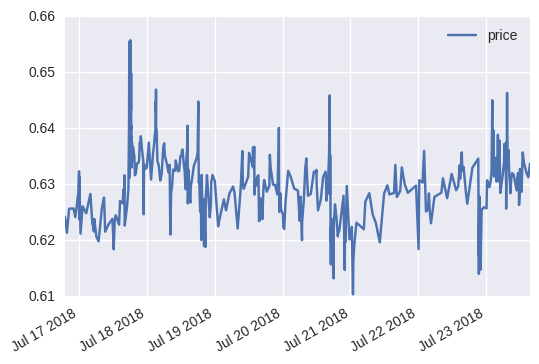

In [5]:
frac = fracDiff_FFD(close, 0.4, 0.0001)

f,ax = plt.subplots()
frac.plot(ax=ax)

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


width: 1; d: 0.000000
width: 503; d: 0.100000
width: 497; d: 0.200000
width: 388; d: 0.300000
width: 282; d: 0.400000
width: 200; d: 0.500000
width: 140; d: 0.600000
width: 97; d: 0.700000
width: 64; d: 0.800000
width: 38; d: 0.900000
width: 2; d: 1.000000


,adfStat,pVal,lags,nObs,95% conf,corr
0.0,-0.142340,9.450546e-01,1.0,698.0,-2.865690,1.000000
0.1,-2.029699,2.737050e-01,1.0,196.0,-2.876402,0.977398
0.2,-2.935939,4.132553e-02,1.0,202.0,-2.875957,0.908849
0.3,-4.993021,2.290989e-05,1.0,311.0,-2.870879,0.699681
0.4,-5.291586,5.699718e-06,1.0,417.0,-2.868496,0.278224
0.5,-7.028586,6.270445e-10,1.0,499.0,-2.867350,0.334640
0.6,-8.983298,7.212412e-15,1.0,559.0,-2.866724,0.354724
0.7,-11.100281,3.880821e-20,1.0,602.0,-2.866353,0.288979
0.8,-13.846131,7.143961e-26,1.0,635.0,-2.866102,0.201922
0.9,-16.035569,5.991487e-29,1.0,661.0,-2.865922,0.132985


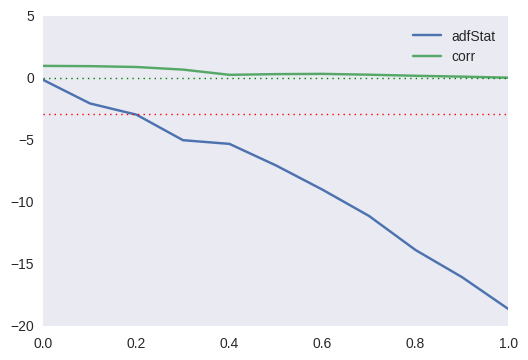

In [6]:
plotMinFFD(close)

# 5.1

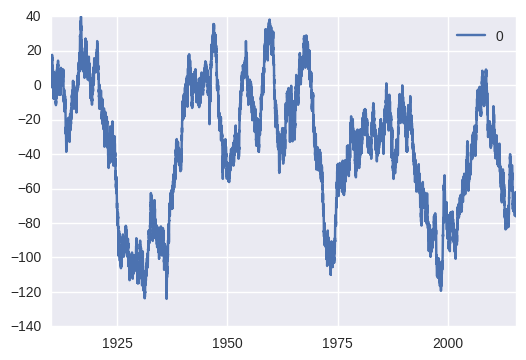

In [7]:
dts = pd.date_range(start='1/1/1910', end='6/23/2015')
samples = pd.DataFrame(pd.Series(np.random.normal(0, 1, len(dts))))
samples.index = dts

cs = np.cumsum(samples)

f,ax = plt.subplots()
cs.plot(ax=ax)


In [8]:
from statsmodels.tsa.stattools import adfuller
adf0 = adfuller(samples[0], maxlag = 1, regression = 'c', autolag = None)
adf0

(-139.21620638003549,
 0.0,
 1,
 38523,
 {'1%': -3.4305197618511851,
  '10%': -2.5668099364773638,
  '5%': -2.8616150307591659})

In [9]:
adf1 = adfuller(cs[0], maxlag = 1, regression = 'c', autolag = None)
adf1

(-2.6269603923528129,
 0.087552133348906325,
 1,
 38523,
 {'1%': -3.4305197618511851,
  '10%': -2.5668099364773638,
  '5%': -2.8616150307591659})

In [10]:
cs1 = fracDiff(cs, 1)
cs2 = fracDiff(cs1, 1)

f,ax = plt.subplots()
cs2.plot(ax=ax)
#samples.plot(ax=ax)

adf2 = adfuller(samples[0], maxlag = 1, regression = 'c', autolag = None)
adf2

KeyboardInterrupt: 

# 5.2

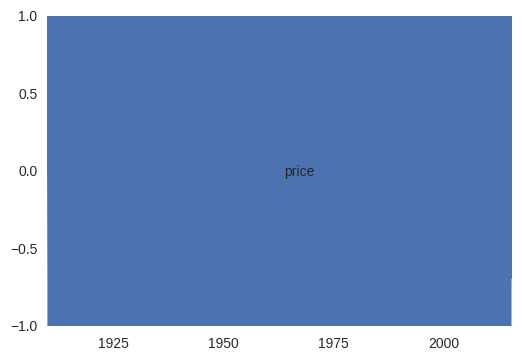

In [11]:
samples = pd.DataFrame(pd.Series(np.sin(pd.Series(range(0,len(dts))) * np.pi/100)))
samples.index = dts
samples.columns = ['price']

f,ax = plt.subplots()
samples.plot(ax=ax)

In [12]:
adf0 = adfuller(samples['price'], maxlag = 1, regression = 'c', autolag = None)
adf0

(-1667982568170.7512,
 0.0,
 1,
 38523,
 {'1%': -3.4305197618511851,
  '10%': -2.5668099364773638,
  '5%': -2.8616150307591659})

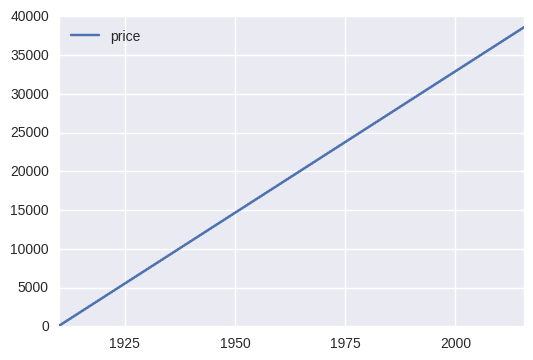

In [13]:
samples = samples + 1
cs = np.cumsum(samples)

f,ax = plt.subplots()
cs.plot(ax=ax)

In [14]:
adf1 = adfuller(cs['price'], maxlag = 1, regression = 'c', autolag = None)
adf1

(-0.65945000563584866,
 0.85697524113099244,
 1,
 38523,
 {'1%': -3.4305197618511851,
  '10%': -2.5668099364773638,
  '5%': -2.8616150307591659})

(-2.8715679898189994, 0.048755559140125596, 1, 805, {'5%': -2.8651370452361107, '1%': -3.4384994096285393, '10%': -2.5686853906099301})


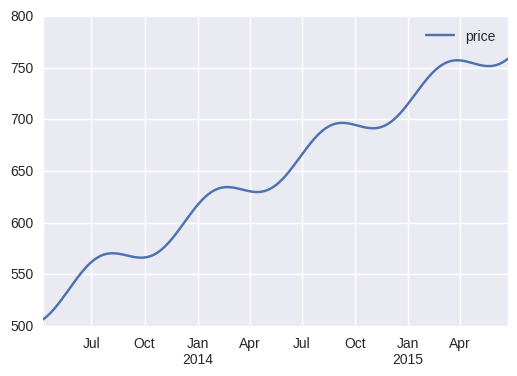

In [36]:
f = fracDiff(cs, 0.2275, 1e-2)

adf2 = adfuller(f['price'], maxlag = 1, regression = 'c', autolag = None)
print adf2

_,ax = plt.subplots()
f.plot(ax=ax)


width: 1458; d: 0.400000
(-2.9239201215371016, 0.042636284629005372, 1, 37065, {'5%': -2.8616179823084016, '1%': -3.4305264401170348, '10%': -2.5668115075080475})


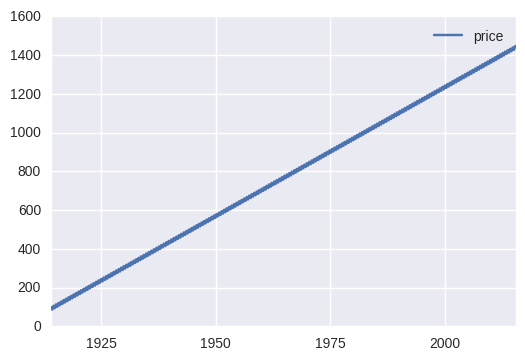

In [17]:
f = fracDiff_FFD(cs, 0.4, 1e-5)

adf3 = adfuller(f['price'], maxlag = 1, regression = 'c', autolag = None)
print adf3

_,ax = plt.subplots()
f.plot(ax=ax)